# Health Care Data Analysis:

### PART 1: Identify providers that overcharge for certain procedures or regions where procedures are too expensive

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as sp
import matplotlib.pyplot as plt

In [2]:
# Read the data from csv
medicare_charge_inpatient= pd.read_csv('Medicare_Charge_Inpatient_DRG100_DRG_Summary_by_DRG_FY2011.csv')
medicare_charge_outpatient= pd.read_csv('Medicare_Charge_Outpatient_APC30_Summary_by_APC_CY2011.csv')
provider_charge_inpatient= pd.read_csv('Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
provider_charge_outpatient= pd.read_csv('Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')                                      

In [3]:
display(medicare_charge_inpatient.head())
display(medicare_charge_outpatient.head())
display(provider_charge_inpatient.head())
display(provider_charge_outpatient.head())

,DRG Definition,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,37861,29228.55368,6902.381289,5514.435910
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,37927,23924.98059,6809.799325,5791.920242
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,68163,49186.95644,13614.616130,12415.825360
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,110983,30371.27399,8037.269492,6858.689088
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,62346,23300.06199,5762.881821,4508.202659


,APC,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,275987,74.202956,16.147079
1,0013 - Level II Debridement & Destruction,434706,196.170070,56.133853
2,0015 - Level III Debridement & Destruction,509576,326.503444,97.156250
3,0019 - Level I Excision/ Biopsy,27860,2013.181972,330.908369
4,0020 - Level II Excision/ Biopsy,40642,3161.457873,567.156154


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444


,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091


###               Data Analysis and Data Preparation           

##### This Analysis will be based on financial summary data from 2011 that were made availible by the centers of  Medicare and Medicaid Services in CSV format. Belew are the two files which will be used here for part 1 analyis:

1. Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv
2. Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv



In [4]:
# Check for the null and missing values in data: 
provider_charge_inpatient.isnull().any()

DRG Definition                                False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Total Discharges                              False
Average Covered Charges                       False
Average Total Payments                        False
Average Medicare Payments                     False
dtype: bool

In [5]:
provider_charge_outpatient.isnull().any()

APC                                           False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Outpatient Services                           False
Average  Estimated Submitted Charges          False
Average Total Payments                        False
dtype: bool

In [6]:
provider_charge_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


Based on the above check, the data looks clean and does not have any null values.

In [7]:
# PART1A - Highest Cost Variation

# As we know that Coffiecnt of Variation= STD/mean. We can find the Highest Cost Variation for inpatients and outpatients 
# based on the provider  and DRG Definition(inpatients) and provider and APC (outpatients).

In [8]:
# Find the standard Deviation and mean for inpatient
std_inpatient=provider_charge_inpatient[['DRG Definition','Provider Name','Average Covered Charges']].groupby(by= ['Provider Name','DRG Definition']).agg('std').add_prefix('std_')
mean_inpatient = provider_charge_inpatient[['DRG Definition','Provider Name','Average Covered Charges']].groupby(by= ['Provider Name','DRG Definition']).agg('mean').add_prefix('mean_')

inpatient = pd.concat([std_inpatient,mean_inpatient], axis=1 )
inpatient.tail()


std_Average Covered Charges  \
Provider Name                              DRG Definition                                                                    
YUMA REGIONAL MEDICAL CENTER               871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HO...                          NaN   
                                           872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HO...                          NaN   
                                           918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                            NaN   
                                           948 - SIGNS & SYMPTOMS W/O MCC                                              NaN   
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      NaN   

                                                                                               mean_Average Covered Charges  
Provider Name                              DRG Definition                                                                    
YUMA REGIONAL MEDICAL CENTER               871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HO...                   44194.96535  
                                           872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HO...                   23954.54545  
                                           918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC                     14494.55556  
                                           948 - SIGNS & SYMPTOMS W/O MCC                                       24444.89474  
ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER 194 - SIMPLE PNEUMONIA & PLEURISY W CC                                7385.25000

In [9]:
inpatient['Highest Cost Variance']= inpatient.apply( lambda x : x['std_Average Covered Charges']/x['mean_Average Covered Charges'], axis=1 )
print("Data for Highest Cost Variation for Inpatient based on procedure  and provider is : ")
inpatient.sort_values(by= 'Highest Cost Variance', ascending= False).head(5)

Data for Highest Cost Variation for Inpatient based on procedure  and provider is : 


,,std_Average Covered Charges,mean_Average Covered Charges,Highest Cost Variance
Provider Name,DRG Definition,,,
CHRIST HOSPITAL,638 - DIABETES W CC,83395.483701,71720.196255,1.162789
GOOD SAMARITAN HOSPITAL,698 - OTHER KIDNEY & URINARY TRACT DIAGNOSES W MCC,46374.641213,42133.662963,1.100655
ST FRANCIS MEDICAL CENTER,309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W CC,40114.244121,37294.617080,1.075604
ST MARY'S MEDICAL CENTER,"280 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE W MCC",110563.517201,103884.787235,1.064290
CHRIST HOSPITAL,309 - CARDIAC ARRHYTHMIA & CONDUCTION DISORDERS W CC,58523.426420,56096.469570,1.043264


In [10]:
# Find the standard Deviation and mean for outpatients

std_outpatient=provider_charge_outpatient[['APC','Average  Estimated Submitted Charges']].groupby(by= ['APC']).agg('std').add_prefix('std_')
mean_outpatient = provider_charge_outpatient[['APC','Average  Estimated Submitted Charges']].groupby(by= ['APC']).agg('mean').add_prefix('mean_')

outpatient = pd.concat([std_outpatient,mean_outpatient], axis=1 )
outpatient.head()

,std_Average Estimated Submitted Charges,mean_Average Estimated Submitted Charges
APC,,
0012 - Level I Debridement & Destruction,95.646537,91.084383
0013 - Level II Debridement & Destruction,255.987420,262.557685
0015 - Level III Debridement & Destruction,240.708776,362.121980
0019 - Level I Excision/ Biopsy,2785.011224,2264.425957
0020 - Level II Excision/ Biopsy,2524.137505,3430.854940


In [11]:
outpatient['Highest Cost Variance'] = outpatient.apply(lambda x: x['std_Average  Estimated Submitted Charges']/x['mean_Average  Estimated Submitted Charges'], axis =1)
print("Data for Highest Cost Variation for outpatient based on APC  and provider is : ")
outpatient= outpatient.sort_values(by= 'Highest Cost Variance', ascending= False).head(5)
outpatient

Data for Highest Cost Variation for outpatient based on APC  and provider is : 


,std_Average Estimated Submitted Charges,mean_Average Estimated Submitted Charges,Highest Cost Variance
APC,,,
0604 - Level 1 Hospital Clinic Visits,235.176544,169.784228,1.385150
0698 - Level II Eye Tests & Treatments,328.498347,250.677099,1.310444
0019 - Level I Excision/ Biopsy,2785.011224,2264.425957,1.229897
0692 - Level II Electronic Analysis of Devices,795.774420,705.369695,1.128166
0012 - Level I Debridement & Destruction,95.646537,91.084383,1.050087


In [12]:
outpatient=outpatient.reset_index()

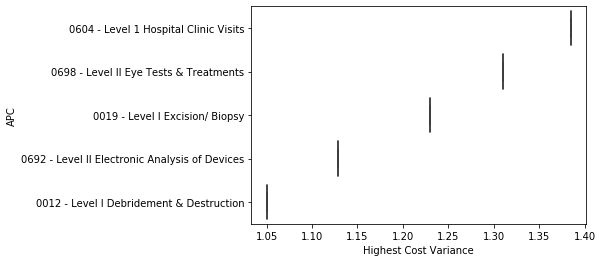

In [13]:
sns.boxplot(y='APC' , x= 'Highest Cost Variance' , data = outpatient)

OUTCOME: From the above analysis, we can conlcude that OutpatientsAPCs overtakes the cost variation of InpatientsDRG and the top 3 procedure are :  
0019 - Level I Excision/ Biopsy
0012 - Level I Debridement & Destruction
0013 - Level II Debridement & Destruction

#### PART1B - Highest Cost Claims by provider


##### Considering 'Average Covered Charges' as 'Claims' 


In [14]:
provider_charge_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [15]:
##### Finding out the max claims (Average Covered Charges) for Inpatients
Max_Claims_Inpatients =provider_charge_inpatient[['DRG Definition','Average Covered Charges']].groupby(['DRG Definition']).agg('max').add_prefix('max_')
Max_Claims_Inpatients


,max_Average Covered Charges
DRG Definition,
039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,146892.00000
057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/O MCC,148128.43750
064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W MCC,234912.70000
065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W CC,162922.50000
066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION W/O CC/MCC,117831.14290
...,...
885 - PSYCHOSES,144522.66670
897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REHABILITATION THERAPY W/O MCC,79932.53846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,236455.90910


In [16]:
#Merging the max value with InpatientDRG dataset
Inpatient_merge = pd.merge(provider_charge_inpatient,Max_Claims_Inpatients, on ='DRG Definition' , how='left')

In [17]:
#function to get the max indicator
def difftyp(Inpatient_merge):
    if ((Inpatient_merge['max_Average Covered Charges']  == Inpatient_merge['Average Covered Charges'])):
        return 1
    else:
        return 0

In [18]:
Inpatient_merge['MAX'] = Inpatient_merge.apply(difftyp, axis=1)

In [19]:
Inpatient_merge.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,max_Average Covered Charges,MAX
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,146892.0,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,146892.0,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,146892.0,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000,146892.0,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444,146892.0,0


In [20]:
#getting number of times a provider has charge max value for procedure
Inpatient_max_provider= pd.DataFrame(Inpatient_merge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_prefix('sum_'),)

In [21]:
Inpatient_max_provider= Inpatient_max_provider.sort_values(by= 'sum_MAX', ascending= False).reset_index().head(10)
Inpatient_max_provider

,Provider Name,sum_MAX
0,BAYONNE HOSPITAL CENTER,23
1,CROZER CHESTER MEDICAL CENTER,11
2,STANFORD HOSPITAL,10
3,HAHNEMANN UNIVERSITY HOSPITAL,7
4,DOCTORS MEDICAL CENTER,5
5,WASHINGTON HOSPITAL,5
6,NORTHBAY MEDICAL CENTER,4
7,SETON MEDICAL CENTER,3
8,REGIONAL MEDICAL CENTER OF SAN JOSE,3
9,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,3


NameError: name 'lable' is not defined

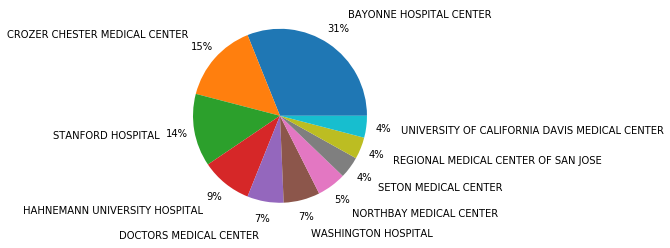

In [23]:
labels= list(Inpatient_max_provider['Provider Name'])
plt.pie(data=Inpatient_max_provider, x= 'sum_MAX', labels= labels, autopct='%1.0f%%', 
       shadow=False, pctdistance=1.2,labeldistance=1.4)
plt.show()

In [24]:
# Finding out the max claims (Average Covered Charges) for outpatients
provider_charge_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [25]:
Max_Claims_outpatients = provider_charge_outpatient[['APC','Average  Estimated Submitted Charges']].groupby('APC').agg('max').add_prefix('Max_')
Max_Claims_outpatients.head()

,Max_Average Estimated Submitted Charges
APC,
0012 - Level I Debridement & Destruction,841.90000
0013 - Level II Debridement & Destruction,5231.00000
0015 - Level III Debridement & Destruction,3080.84963
0019 - Level I Excision/ Biopsy,26466.64500
0020 - Level II Excision/ Biopsy,19018.40882


In [26]:
Outpatient_merge = pd.merge(provider_charge_outpatient, Max_Claims_outpatients , on ='APC', how='left')


In [27]:
Outpatient_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43372 entries, 0 to 43371
Data columns (total 12 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
Max_Average  Estimated Submitted Charges      43372 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 4.3+ MB


In [28]:
#function to get the max indicator
def difftyp(Outpatient_merge):
    if ((Outpatient_merge['Max_Average  Estimated Submitted Charges']  == Outpatient_merge['Average  Estimated Submitted Charges'])):
        return 1
    else:
        return 0

In [29]:
Outpatient_merge['MAX'] = Outpatient_merge.apply(difftyp, axis=1)
Outpatient_merge

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Average Estimated Submitted Charges,Average Total Payments,Max_Average Estimated Submitted Charges,MAX
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435,841.900,0
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,841.900,0
2,0012 - Level I Debridement & Destruction,30064,"UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE",1501 NORTH CAMPBELL AVENUE,TUCSON,AZ,85724,AZ - Tucson,1765,50.135411,14.541841,841.900,0
3,0012 - Level I Debridement & Destruction,30088,BANNER BAYWOOD MEDICAL CENTER,6644 EAST BAYWOOD AVENUE,MESA,AZ,85206,AZ - Mesa,20,112.400000,23.736000,841.900,0
4,0012 - Level I Debridement & Destruction,30111,"UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE",2800 EAST AJO WAY,TUCSON,AZ,85713,AZ - Tucson,22,152.045455,16.569091,841.900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43367,0698 - Level II Eye Tests & Treatments,520098,UNIVERSITY OF WI HOSPITALS & CLINICS AUTHORITY,600 HIGHLAND AVENUE,MADISON,WI,53792,WI - Madison,2852,211.752854,71.776392,4187.255,0
43368,0698 - Level II Eye Tests & Treatments,520100,BELOIT MEM HSPTL,1969 W HART RD,BELOIT,WI,53511,WI - Madison,912,164.068882,65.369989,4187.255,0
43369,0698 - Level II Eye Tests & Treatments,520116,UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR,125 HOSPITAL DR,WATERTOWN,WI,53098,WI - Madison,188,119.579787,67.520000,4187.255,0
43370,0698 - Level II Eye Tests & Treatments,520177,FROEDTERT MEM LUTHERAN HSPTL,9200 W WISCONSIN AVE,MILWAUKEE,WI,53226,WI - Milwaukee,1554,155.406969,66.719949,4187.255,0


In [30]:
#getting number of times a provider has charge max value for procedure
Outpatient_max_provider= pd.DataFrame(Outpatient_merge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_prefix('sum_'),)

In [31]:
Outpatient_max_provider.sort_values(by= 'sum_MAX', ascending= False)

,sum_MAX
Provider Name,
COLUMBIA HOSPITAL,2
FORT WALTON BEACH MEDICAL CENTER,2
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL,2
FAIRVIEW DEVELOPMENTAL CENTER,1
BEVERLY HOSPITAL CORPORATION,1
...,...
HIGHLANDS HOSPITAL,0
HIGHLANDS MEDICAL CENTER,0
HIGHLANDS REGIONAL MEDICAL CENTER,0


#### PART1C - Highest Cost Claims by Region


##### For Inpatients

In [32]:
#Finding the mean of Average Covered Charges(Claims) for Inpatient by Hospital Region and DRG Defination
Inpatient_avg_claim = pd.DataFrame(provider_charge_inpatient[['DRG Definition', 'Hospital Referral Region (HRR) Description',  'Average Covered Charges']].groupby(['DRG Definition', 'Hospital Referral Region (HRR) Description']).agg('mean').add_prefix('avg_')).reset_index()
Inpatient_avg_claim.head()


,DRG Definition,Hospital Referral Region (HRR) Description,avg_Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118


In [33]:
#Finding the max claim for Inpatient based on region
Inpatient_max_claim = pd.DataFrame(Inpatient_avg_claim[['DRG Definition', 'avg_Average Covered Charges']].groupby(['DRG Definition']).agg('max').add_prefix('max_'))
Inpatient_max_claim.reset_index().head()

,DRG Definition,max_avg_Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,105929.470600
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,148128.437500
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,145720.057518
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,73820.938782
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,65418.983067


In [34]:
#Merging The mean and max - will give side by side comparison of region having highest claims
Inpatient_claim_merge = pd.merge(Inpatient_avg_claim,Inpatient_max_claim,on='DRG Definition', how='left')
Inpatient_claim_merge.head()

,DRG Definition,Hospital Referral Region (HRR) Description,avg_Average Covered Charges,max_avg_Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK - Anchorage,34805.130430,105929.4706
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Birmingham,40237.361538,105929.4706
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Dothan,36285.182905,105929.4706
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Huntsville,18878.955554,105929.4706
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL - Mobile,22802.270118,105929.4706


In [35]:
#function to get the max indicator
def difftyp(Inpatient_claim_merge):
    if ((Inpatient_claim_merge['avg_Average Covered Charges'] >= Inpatient_claim_merge['max_avg_Average Covered Charges'])):
        return 1
    else:
        return 0

In [36]:
Inpatient_claim_merge['MAX'] = Inpatient_claim_merge.apply(difftyp, axis=1)
#Inpatient_claim_merge.sort_values('MAX', ascending= False).head()
Inpatient_claim_merge[Inpatient_claim_merge['MAX']==1].head()


,DRG Definition,Hospital Referral Region (HRR) Description,avg_Average Covered Charges,max_avg_Average Covered Charges,MAX
22,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA - Napa,105929.470600,105929.470600,1
330,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA - San Mateo County,148128.437500,148128.437500,1
588,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,145720.057518,145720.057518,1
907,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - San Mateo County,73820.938782,73820.938782,1
1198,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA - Contra Costa County,65418.983067,65418.983067,1


In [37]:
#getting number of times a region has charge max value for procedure
Inpatient_claim_merge_count = pd.DataFrame(Inpatient_claim_merge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_prefix('sum_'),).reset_index()
Inpatient_claim_merge_count.head()


,Hospital Referral Region (HRR) Description,sum_MAX
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


##### For Outpatients APC

In [38]:
#Finding the mean of Average Covered Charges(Claims) for Outpatient by Hospital Region and DRG Defination
Outpatient_avg_claim = pd.DataFrame(provider_charge_outpatient[['APC', 'Hospital Referral Region (HRR) Description',  'Average  Estimated Submitted Charges']].groupby(['APC', 'Hospital Referral Region (HRR) Description']).agg('mean').add_prefix('avg_')).reset_index()
Outpatient_avg_claim.head()


,APC,Hospital Referral Region (HRR) Description,avg_Average Estimated Submitted Charges
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863


In [39]:
#Finding the max claim for Outpatient based on region
Outpatient_max_claim = pd.DataFrame(Outpatient_avg_claim[['APC', 'avg_Average  Estimated Submitted Charges']].groupby(['APC']).agg('max').add_prefix('max_'))
Outpatient_max_claim.reset_index().head()

,APC,max_avg_Average Estimated Submitted Charges
0,0012 - Level I Debridement & Destruction,438.307045
1,0013 - Level II Debridement & Destruction,1042.707451
2,0015 - Level III Debridement & Destruction,1478.536545
3,0019 - Level I Excision/ Biopsy,15946.325655
4,0020 - Level II Excision/ Biopsy,15784.975000


In [40]:
#Merging The mean and max - will give side by side comparison of region having highest claims
Outpatient_claim_merge = pd.merge(Outpatient_avg_claim,Outpatient_max_claim,on='APC', how='left')
Outpatient_claim_merge.head()

,APC,Hospital Referral Region (HRR) Description,avg_Average Estimated Submitted Charges,max_avg_Average Estimated Submitted Charges
0,0012 - Level I Debridement & Destruction,AK - Anchorage,149.589749,438.307045
1,0012 - Level I Debridement & Destruction,AL - Birmingham,78.086957,438.307045
2,0012 - Level I Debridement & Destruction,AR - Fort Smith,80.102439,438.307045
3,0012 - Level I Debridement & Destruction,AR - Jonesboro,16.993333,438.307045
4,0012 - Level I Debridement & Destruction,AR - Little Rock,96.968863,438.307045


In [41]:
#function to get the max indicator
def difftyp(Outpatient_claim_merge):
    if ((Outpatient_claim_merge['avg_Average  Estimated Submitted Charges'] >= Outpatient_claim_merge['max_avg_Average  Estimated Submitted Charges'])):
        return 1
    else:
        return 0

In [42]:
Outpatient_claim_merge['MAX'] = Outpatient_claim_merge.apply(difftyp, axis=1)
Outpatient_claim_merge[Outpatient_claim_merge['MAX']== 1].head()

,APC,Hospital Referral Region (HRR) Description,avg_Average Estimated Submitted Charges,max_avg_Average Estimated Submitted Charges,MAX
93,0012 - Level I Debridement & Destruction,NE - Omaha,438.307045,438.307045,1
160,0013 - Level II Debridement & Destruction,AL - Dothan,1042.707451,1042.707451,1
582,0015 - Level III Debridement & Destruction,MI - Dearborn,1478.536545,1478.536545,1
756,0019 - Level I Excision/ Biopsy,CA - Los Angeles,15946.325655,15946.325655,1
1013,0020 - Level II Excision/ Biopsy,IL - Aurora,15784.975000,15784.975000,1


In [43]:
#getting number of times a region has charge max value for procedure
Outpatient_claim_merge_count = pd.DataFrame(Outpatient_claim_merge[['Hospital Referral Region (HRR) Description','MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_prefix('sum_'),).reset_index()
Outpatient_claim_merge_count.head()


,Hospital Referral Region (HRR) Description,sum_MAX
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,1
3,AL - Huntsville,1
4,AL - Mobile,0


In [44]:
frames = [Inpatient_claim_merge_count, Outpatient_claim_merge_count]
Combined_data_region = pd.concat(frames)
Combined_data_region.head()



,Hospital Referral Region (HRR) Description,sum_MAX
0,AK - Anchorage,0
1,AL - Birmingham,0
2,AL - Dothan,0
3,AL - Huntsville,0
4,AL - Mobile,0


In [45]:
#getting the total sum of occurance
Combined_data_region_final = pd.DataFrame(Combined_data_region[['Hospital Referral Region (HRR) Description','sum_MAX']].groupby(['Hospital Referral Region (HRR) Description']).agg('sum').add_prefix('agg_'),)

In [46]:

Combined_data_region_final= Combined_data_region_final['agg_sum_MAX'].nlargest(10)


#### PART1D - Largest claim difference for the largest number of procedures by providers

##### For Inpatients

In [47]:
# For the above analysis, consdiering 'Average Covered Charges' as Claims and 
# 'Average Total Payments' as Reimbursement

In [48]:
# Renaming colums
provider_charge_inpatient.rename(columns= {'Average Covered Charges': 'Claims','Average Total Payments': 'Reimbursement' },inplace= True)

In [49]:
provider_charge_inpatient.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Claims,Reimbursement,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286


In [50]:
# Find the differecne between Claims and Reimbursement
provider_charge_inpatient['claim_diff']= provider_charge_inpatient.apply(lambda x: x['Claims'] - x['Reimbursement'], axis=1)
provider_charge_inpatient.head(2)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Claims,Reimbursement,Average Medicare Payments,claim_diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,27185.835162
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,9344.285711


In [51]:
# Find the mean of claim difference based on the procedure aka DRG Definition
Inpatient_claim_diff_avg = pd.DataFrame(provider_charge_inpatient[['DRG Definition','Provider Name','claim_diff']].groupby(['DRG Definition','Provider Name']).agg('mean').add_prefix('avg_'))


In [52]:
Inpatient_claim_diff_avg=Inpatient_claim_diff_avg.reset_index()
Inpatient_claim_diff_avg.head()

,DRG Definition,Provider Name,avg_claim_diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141


In [53]:
# Find the max for avg_claim_diff
Inpatient_claim_diff_max = pd.DataFrame(Inpatient_claim_diff_avg[['DRG Definition','avg_claim_diff']].groupby('DRG Definition').agg('max').add_prefix('max_')).reset_index()
Inpatient_claim_diff_max.head()

,DRG Definition,max_avg_claim_diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,135377.61538
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,122609.00000
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,214346.92103
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,144842.08333
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,109535.14290


In [54]:
Inpatient_claim_diff_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
DRG Definition        100 non-null object
max_avg_claim_diff    100 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [55]:
#Merging The mean and max - will give side by side comparison of provider having highest claims diff
#Inpatient_claim_diff_merge= pd.merge('Inpatient_claim_diff_avg', 'Inpatient_claim_diff_max', on='DRG Definition', how ='left')
Inpatient_claim_diff_merge = Inpatient_claim_diff_avg.merge(Inpatient_claim_diff_max,on='DRG Definition', how='left')


In [56]:
Inpatient_claim_diff_merge

,DRG Definition,Provider Name,avg_claim_diff,max_avg_claim_diff
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.615380
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.615380
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299,135377.615380
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998,135377.615380
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141,135377.615380
...,...,...,...,...
157368,948 - SIGNS & SYMPTOMS W/O MCC,YALE-NEW HAVEN HOSPITAL,17481.786405,78110.785714
157369,948 - SIGNS & SYMPTOMS W/O MCC,YAVAPAI REGIONAL MEDICAL CENTER,10229.000000,78110.785714
157370,948 - SIGNS & SYMPTOMS W/O MCC,YAVAPAI REGIONAL MEDICAL CENTER-EAST,10670.266667,78110.785714
157371,948 - SIGNS & SYMPTOMS W/O MCC,YORK HOSPITAL,6751.069602,78110.785714


In [57]:
#function to get the max indicator
def difftyp(Inpatient_claim_diff_merge):
    if ((Inpatient_claim_diff_merge['avg_claim_diff'] >= Inpatient_claim_diff_merge['max_avg_claim_diff'])):
        return 1
    else:
        return 0

In [58]:
Inpatient_claim_diff_merge['MAX'] = Inpatient_claim_diff_merge.apply(difftyp, axis=1 )
Inpatient_claim_diff_merge.head()

,DRG Definition,Provider Name,avg_claim_diff,max_avg_claim_diff,MAX
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABBOTT NORTHWESTERN HOSPITAL,27026.166671,135377.61538,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABILENE REGIONAL MEDICAL CENTER,29293.857146,135377.61538,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ABINGTON MEMORIAL HOSPITAL,33207.235299,135377.61538,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADENA REGIONAL MEDICAL CENTER,16247.499998,135377.61538,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,ADVENTIST LA GRANGE MEMORIAL HOSPITAL,30415.357141,135377.61538,0


In [59]:
Inpatient_claim_diff_merge[Inpatient_claim_diff_merge['MAX'] == 1].head()

,DRG Definition,Provider Name,avg_claim_diff,max_avg_claim_diff,MAX
980,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,UNIVERSITY OF CALIFORNIA DAVIS MEDICAL CENTER,135377.61538,135377.61538,1
2048,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,STANFORD HOSPITAL,122609.00000,122609.00000,1
2533,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,DOCTORS MEDICAL CENTER,214346.92103,214346.92103,1
3953,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,BAYONNE HOSPITAL CENTER,144842.08333,144842.08333,1
6514,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HAHNEMANN UNIVERSITY HOSPITAL,109535.14290,109535.14290,1


In [60]:
#getting number of times a provider has max claim diff for max procudures
Inpatient_claim_diff_merge_final = pd.DataFrame(Inpatient_claim_diff_merge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_prefix('sum_'),)

In [61]:
Inpatient_claim_diff_merge_final['sum_MAX'].nlargest(5)

Provider Name
BAYONNE HOSPITAL CENTER          29
CROZER CHESTER MEDICAL CENTER    12
HAHNEMANN UNIVERSITY HOSPITAL     8
STANFORD HOSPITAL                 6
WASHINGTON HOSPITAL               6
Name: sum_MAX, dtype: int64

#### For Outpatients 



In [62]:
# Considering column 'Average Estimated Submitted Charges' as 'Claims' and 'Average Total Payments' as Reimbursment

provider_charge_outpatient.columns

Index(['APC', 'Provider Id', 'Provider Name', 'Provider Street Address',
       'Provider City', 'Provider State', 'Provider Zip Code',
       'Hospital Referral Region (HRR) Description', 'Outpatient Services',
       'Average  Estimated Submitted Charges', 'Average Total Payments'],
      dtype='object')

In [63]:
provider_charge_outpatient.rename(columns= {'Average  Estimated Submitted Charges': 'Claims','Average Total Payments': 'Reimbursement' },inplace= True)

In [64]:
# Find the differecne between Claims and Reimbursement
provider_charge_outpatient['claim_diff']= provider_charge_outpatient.apply(lambda x: x['Claims'] - x['Reimbursement'], axis=1)
provider_charge_outpatient.head(2)

,APC,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Outpatient Services,Claims,Reimbursement,claim_diff
0,0012 - Level I Debridement & Destruction,10029,EAST ALABAMA MEDICAL CENTER AND SNF,2000 PEPPERELL PARKWAY,OPELIKA,AL,36801,AL - Birmingham,23,78.086957,21.910435,56.176522
1,0012 - Level I Debridement & Destruction,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,AK - Anchorage,994,149.589749,36.623853,112.965895


In [65]:
# Find the mean of claim difference based on the procedure aka DRG Definition
outpatient_claim_diff_avg = pd.DataFrame(provider_charge_outpatient[['APC','Provider Name','claim_diff']].groupby(['APC','Provider Name']).agg('mean').add_prefix('avg_'))


In [66]:
outpatient_claim_diff_avg=outpatient_claim_diff_avg.reset_index()
outpatient_claim_diff_avg.head()

,APC,Provider Name,avg_claim_diff
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495
2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846
3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013
4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715


In [67]:
# Find the max for avg_claim_diff
outpatient_claim_diff_max = pd.DataFrame(outpatient_claim_diff_avg[['APC','avg_claim_diff']].groupby('APC').agg('max').add_prefix('max_')).reset_index()
outpatient_claim_diff_max.head()

,APC,max_avg_claim_diff
0,0012 - Level I Debridement & Destruction,827.44000
1,0013 - Level II Debridement & Destruction,5175.40000
2,0015 - Level III Debridement & Destruction,2980.73963
3,0019 - Level I Excision/ Biopsy,26073.80500
4,0020 - Level II Excision/ Biopsy,18362.75882


In [68]:
outpatient_claim_diff_max.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
APC                   30 non-null object
max_avg_claim_diff    30 non-null float64
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


In [69]:
#Merging The mean and max - will give side by side comparison of provider having highest claims diff

outpatient_claim_diff_merge = outpatient_claim_diff_avg.merge(outpatient_claim_diff_max,on='APC', how='left')


In [70]:
outpatient_claim_diff_merge

,APC,Provider Name,avg_claim_diff,max_avg_claim_diff
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.440
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.440
2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846,827.440
3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013,827.440
4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715,827.440
...,...,...,...,...
41861,0698 - Level II Eye Tests & Treatments,WEST VIRGINIA UNIVERSITY HOSPITALS,73.125095,4112.395
41862,0698 - Level II Eye Tests & Treatments,WILLIAM BEAUMONT HOSPITAL,136.081093,4112.395
41863,0698 - Level II Eye Tests & Treatments,WILLIAM N WISHARD MEMORIAL HOSPITAL,43.753123,4112.395
41864,0698 - Level II Eye Tests & Treatments,WYCKOFF HEIGHTS MEDICAL CENTER,173.734483,4112.395


In [71]:
#function to get the max indicator
def difftyp(outpatient_claim_diff_merge):
    if ((outpatient_claim_diff_merge['avg_claim_diff'] >= outpatient_claim_diff_merge['max_avg_claim_diff'])):
        return 1
    else:
        return 0

In [72]:
outpatient_claim_diff_merge['MAX'] = outpatient_claim_diff_merge.apply(difftyp, axis=1 )
outpatient_claim_diff_merge.head()

,APC,Provider Name,avg_claim_diff,max_avg_claim_diff,MAX
0,0012 - Level I Debridement & Destruction,ALTON MEMORIAL HOSPITAL,91.856818,827.44,0
1,0012 - Level I Debridement & Destruction,ALTRU HOSPITAL,7.259495,827.44,0
2,0012 - Level I Debridement & Destruction,ARNOT OGDEN MEDICAL CENTER,98.893846,827.44,0
3,0012 - Level I Debridement & Destruction,"AROOSTOOK MEDICAL CENTER,THE",16.975013,827.44,0
4,0012 - Level I Debridement & Destruction,AVERA MCKENNAN HOSPITAL & UNIVERSITY HEALTH CE...,22.306715,827.44,0


In [73]:
outpatient_claim_diff_merge[outpatient_claim_diff_merge['MAX'] == 1].head()

,APC,Provider Name,avg_claim_diff,max_avg_claim_diff,MAX
152,0012 - Level I Debridement & Destruction,NEBRASKA ORTHOPAEDIC HOSPITAL,827.44000,827.44000,1
1265,0013 - Level II Debridement & Destruction,RUSSELLVILLE HOSPITAL,5175.40000,5175.40000,1
2703,0015 - Level III Debridement & Destruction,RESEARCH MEDICAL CENTER,2980.73963,2980.73963,1
3247,0019 - Level I Excision/ Biopsy,CENTINELA HOSPITAL MEDICAL CENTER,26073.80500,26073.80500,1
4255,0020 - Level II Excision/ Biopsy,ORANGE COAST MEMORIAL MEDICAL CENTER,18362.75882,18362.75882,1


In [74]:
#getting number of times a provider has max claim diff for max procudures
outpatient_claim_diff_merge_final = pd.DataFrame(outpatient_claim_diff_merge[['Provider Name','MAX']].groupby(['Provider Name']).agg('sum').add_prefix('sum_'),)

In [75]:
outpatient_claim_diff_merge_final['sum_MAX'].nlargest(5)

Provider Name
CAPITAL HEALTH MEDICAL CENTER - HOPEWELL    2
COLUMBIA HOSPITAL                           2
FORT WALTON BEACH MEDICAL CENTER            2
BEVERLY HOSPITAL CORPORATION                1
CENTINELA HOSPITAL MEDICAL CENTER           1
Name: sum_MAX, dtype: int64